In [1]:
%matplotlib inline

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

PID Parameters:

$p = 10/2^4$

$i = 1/2^8$

In [41]:
# POSITIVE
ts1 = np.array([32., 115., 203., 283., 368., 456., 541., 624., 709., 792.])*1.e-3  # seconds
ys1 = np.array([880., 720., 640., 520., 480., 380., 360., 280., 260., 200.])*1.e-3 # Volts

# NEGATIVE
ts2 = np.array([74.6, 157., 243., 328., 411., 496., 579., 664., 752., 835.])*1.e-3  # seconds
ys2 = np.array([-1280., -1020., -900., -740., -600., -500., -400., -340., -300., -220.])*1.e-3 # V

In [26]:
def fitfunc(ts, alpha, beta, gamma):
    return gamma*np.exp(-alpha*ts) + beta

In [45]:
popt1, pcov1 = curve_fit(fitfunc, ts1, ys1, p0=(1., 1., 1.), maxfev=1000)
popt2, pcov2 = curve_fit(fitfunc, ts2, ys2, p0=(1., 1., -1.), maxfev=1000)

In [47]:
print "For POSITIVE side"
print "alpha (expcoeff) = {0}\nbeta (offset) = {1}\ngamma (amplitude) = {2}".format(*popt1)

print "For NEGATIVE side"
print "alpha (expcoeff) = {0}\nbeta (offset) = {1}\ngamma (amplitude) = {2}".format(*popt2)

For POSITIVE side
alpha (expcoeff) = 1.93782807577
beta (offset) = 0.0201481968722
gamma (amplitude) = 0.901234137274
For NEGATIVE side
alpha (expcoeff) = 2.13165757022
beta (offset) = 0.025719148072
gamma (amplitude) = -1.51475801559


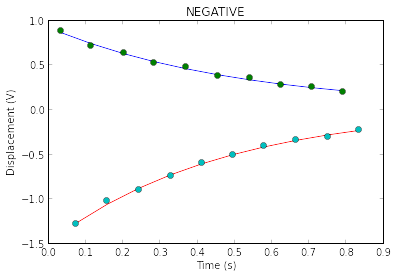

In [49]:
fitys1 = fitfunc(ts1, *popt1)
fitys2 = fitfunc(ts2, popt2[0], popt2[1], popt2[2])
plt.plot(ts1, fitys1)
plt.plot(ts1, ys1, 'o')
plt.title('POSITIVE')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (V)')

#plt.figure()
plt.plot(ts2, fitys2)
plt.plot(ts2, ys2, 'o')
plt.title('NEGATIVE')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (V)')

In [75]:
alpha1, alpha2 = popt1[0], popt2[0]
alpha = 0.5*(alpha1 + alpha2)
print "alpha = omega_0 Zeta = {0} rad/s".format(alpha)

alpha = omega_0 Zeta = 2.034742823 rad/s


In [57]:
ts3 = np.array([-9.15, 26.6, 75.1, 111., 160., 196., 245., 281., 329., 366.])*1.e-3
ys3 = np.array([40., 0., 0., 0., 20., 0., 20., 0., 40., 20.])
ns3 = np.arange(len(ts3))/2.

In [77]:
m, _ = np.polyfit(ns3, ts3, 1)
omega0 = 2*np.pi/m
print "omega_0 = {0} rad/s".format(omega0)
zeta = alpha/omega0
print "zeta = {0} (unitless)".format(zeta)

omega_0 = 74.4704571904 rad/s
zeta = 0.0273228190045 (unitless)


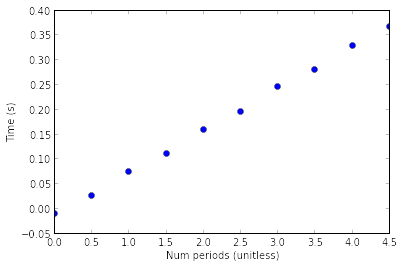

In [66]:
plt.plot(ns3, ts3, 'o')
plt.xlabel('Num periods (unitless)')
plt.ylabel('Time (s)')

PID Parameters:

$p = 6/2^4$

$i = 1/2^8$

In [78]:
#POSITIVE
ts4 = np.array([15.1,115.,220.,320.,422.,527.,630.,724.,835.])*1e-3 #[seconds]
ys4 = np.array([620.,420.,320.,260.,180.,180.,120.,120.,80.])*1e-3 #[Volts]

#NEGATIVE
ts5 = np.array([65.7,166.,267.,367.,475.,576.,678.,779.,886.])*1e-3 #[seconds]
ys5 = np.array([-1040.,-760.,-560.,-400.,-260.,-200.,-120.,-120.,-80.])*1e-3 #[Volts]

In [83]:
popt4, pcov4 = curve_fit(fitfunc, ts4, ys4, p0=(1., 1., 1.), maxfev=1000)
popt5, pcov5 = curve_fit(fitfunc, ts5, ys5, p0=(1., 1., -1.), maxfev=1000)

In [84]:
print "For POSITIVE side"
print "alpha (expcoeff) = {0}\nbeta (offset) = {1}\ngamma (amplitude) = {2}".format(*popt4)

print "For NEGATIVE side"
print "alpha (expcoeff) = {0}\nbeta (offset) = {1}\ngamma (amplitude) = {2}".format(*popt5)

For POSITIVE side
alpha (expcoeff) = 3.7252160703
beta (offset) = 0.0732361752769
gamma (amplitude) = 0.566452872348
For NEGATIVE side
alpha (expcoeff) = 3.21799909305
beta (offset) = 0.00278070592052
gamma (amplitude) = -1.29556511216


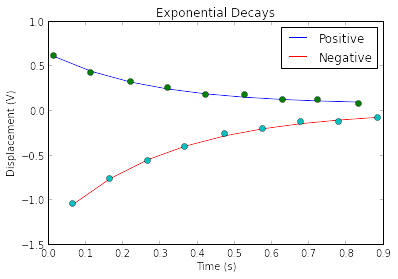

In [86]:
fitys4 = fitfunc(ts4, *popt4)
fitys5 = fitfunc(ts5, popt5[0], popt5[1], popt5[2])
plt.plot(ts4, fitys4, label='Positive')
plt.plot(ts4, ys4, 'o')
plt.title('Exponential Decays')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (V)')

#plt.figure()
plt.plot(ts5, fitys5, label='Negative')
plt.plot(ts5, ys5, 'o')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (V)')
plt.legend()

In [87]:
alpha4, alpha5 = popt4[0], popt5[0]
alpha45 = 0.5*(alpha4 + alpha5)
print "alpha = omega_0 Zeta = {0} rad/s".format(alpha45)

alpha = omega_0 Zeta = 3.47160758167 rad/s


In [88]:
ts6 = np.array([-3.6,34.3,98.3,136.,200.,240.,301.,344.,405.,444.,505.,546.,608.])*1.e-3
ns6 = np.arange(len(ts6))/2.

In [89]:
m, _ = np.polyfit(ns6, ts6, 1)
omega0 = 2*np.pi/m
print "omega_0 = {0} rad/s".format(omega0)
zeta = alpha45/omega0
print "zeta = {0} (unitless)".format(zeta)

omega_0 = 61.5276031113 rad/s
zeta = 0.0564235791112 (unitless)


Compute the parameters!
------

In [90]:
ki1 = 1./2**8
kp1 = 10./2**4
ki2 = 1./2**8
kp2 = 6./2**4

w01 = 74.4704571904  # rad/s
zeta1 = 0.0273228190045  # unitless

w02 = 61.5276031113  # rad/s
zeta2 = 0.0564235791112

alpha02 = (w01/w02)*(2*zeta1 + ki1/ki2 * (w02/w01)**3) - 2*zeta2
alpha01 = ki1/ki2*(w02/w01)**3 * alpha02

b_1 = alpha01*w01**3/ki1
b_2 = alpha02*w02**3/ki2
b = 0.5*(b_1 + b_2)

a1_1 = w01*(2*zeta1 + alpha01)
a1_2 = w02*(2*zeta2 + alpha02)
a1 = 0.5*(a1_1 + a1_2)

a2_1 = (1 + 2*alpha01*zeta1)*w01**2 - kp1*b_1
a2_2 = (1 + 2*alpha02*zeta2)*w02**2 - kp2*b_2
a2 = 0.5*(a2_1 + a2_2)

In [91]:
w0_opt = a1/3.
kp_opt = (a1**2 - 3*a2)/(3*b)
log2kp = np.floor(np.log2(kp_opt))
ki_opt = a1**3/(27*b)
log2ki = np.floor(np.log2(ki_opt))

p = kp_opt / 2**log2kp
i = ki_opt / 2**log2ki

In [92]:
print "w0 = ", w0_opt
print "kp = ", kp_opt
print "ki = ", ki_opt

print "p = {0}/2^{1}".format(p, -log2kp)
print "i = {0}/2^{1}".format(i, -log2ki)

w0 =  12.8076196406
kp =  0.499884913164
ki =  5.54070121587e-05
p = 1.99953965266/2^2.0
i = 1.81557697442/2^15.0
